<a href="https://colab.research.google.com/github/eirikngard/Eika/blob/master/Skadekost_per_skade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from google.colab import files

In [4]:

uploaded = files.upload()

Saving Vannskade_år_count.xlsx to Vannskade_år_count.xlsx


In [ ]:
kol = ['Produktkode','Skadedato','År','Årsak','Ant']

data = pd.read_excel('Vannskade_år_count.xlsx',skiprows=0,names=kol)
data.drop(data.loc[data['År']<2000].index, inplace=True) #fjerner år mindre nn 2000
data.fillna(0)

In [36]:
år = list(set(data['År'].values))


In [37]:
# summere ant skadenummer per år per skadeårsak
#sum_list = []
dt = pd.DataFrame(columns=['Vann utenfra','Frost','Tilstopping'])
cols = ['Frost', 'Tilstopping','Vann utenfra']
år = np.arange(2000,2021,1)
for i in cols:
  årlig = []
  for j in år:
    df = data.loc[(data['Årsak']==i) & (data['År']==j)]['Ant'].sum()
    årlig.append(df)
  #sum_list.append(årlig)
  dt[str(i)] = årlig

In [ ]:
dt

In [39]:
data.loc[(data['År']==2016) & (data['Årsak']=='Frost'),'Ant'].sum() #ant skalder for gitt år og skade

116

In [ ]:
#dt.to_excel("output_test.xlsx") #lag xcelfil 

# Beregne trend på nytt inkl skadeant

In [42]:
uploaded = files.upload()
#fno_værrelatert_vannskade_2000-2020.csv 


Saving fno_værrelatert_vannskade_2000-2020.csv to fno_værrelatert_vannskade_2000-2020.csv


In [ ]:
kol = ['år','årsak','skade']
vær = pd.read_csv('fno_værrelatert_vannskade_2000-2020.csv',sep=',',skiprows=1,names=kol)
vær

In [44]:
#summere skader
dtt = pd.DataFrame(columns=['Vann utenfra','Frost','Tilstopping'])
cols = ['Frost', 'Tilstopping','Vann utenfra']
år = np.arange(2000,2021,1)
for i in cols:
  årlig = []
  for j in år:
    df = vær.loc[(vær['årsak']==i) & (vær['år']==j)]['skade'].sum()
    årlig.append(df)
  #sum_list.append(årlig)
  dtt[str(i)] = årlig

In [82]:
#lineær regresjon for trend
pred = []
for i,j  in enumerate(cols):
  reg = LinearRegression()
  nkost = np.array(skadekost[cols[i]]).reshape(-1,1)
  når = år.reshape(-1,1)
  reg.fit(når,nkost)
  predictions = reg.predict(når)
  pred.append(predictions)
  #print(predictions)
  print(reg.coef_[0][0])

1989.5907220565236
968.3561320556355
784.4230559224561


In [78]:
print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")

The slope is 784.4230559224561 and the intercept is -1542485.9505967377


In [59]:
grønn = '#84BD00'
blå = '#60C3E6'
grå = '#6E6259'
blå1='#3396b9'
rød='#7f3035'
sjøgrønn='#004f59'

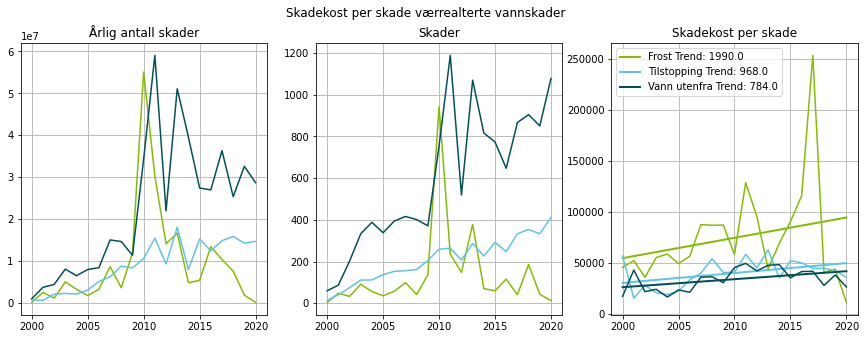

In [84]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
titles = ['Årlig antall skader','Skader','Skadekost per skade']
fig.suptitle('Skadekost per skade værrealterte vannskader')
colors = [grønn,blå,sjøgrønn]
for i,j in enumerate(cols):
  ax[2].plot(år,dtt[cols[i]]/dt[cols[i]],color=colors[i])
  ax[2].plot(når, pred[i],color=colors[i] , linewidth=2,
             label=str(cols[i])+' Trend: '+str(stigning[i]))
  ax[0].plot(år,dtt[cols[i]],label=cols[i],color=colors[i])
  ax[1].plot(år,dt[cols[i]],label=cols[i],color=colors[i])
  ax[i].set_title(titles[i])
  ax[i].grid()
plt.legend()
plt.show()